In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

In [44]:
# *************************************
# *** READ SOME DATA FROM A PROJECT ***
# *************************************
print('*************************************')
print('- Project name is ', b025_f001['project_name'])
print('- Major radius of the consedered tokamak is {:0.3f} m'.format(b025_f001['R0']))
print('- Project has Lx = {:0.3f}'.format(b025_f001['Lx']))
print('- Working radial domain is s = [{:0.3f}, {:0.3f}]'.format(b025_f001['sfmin'], b025_f001['sfmax']))
print('- All species in the project are ', b025_f001['species_names'])
print('- All kinetic species in the project are ', b025_f001['kin_species_names'])

print('\n*************************************')
print('- Project name is ', b025k_f001['project_name'])
print('- All species in the project are ', b025k_f001['species_names'])
print('- All kinetic species in the project are ', b025k_f001['kin_species_names'])

print('\n*************************************')
print('- Current data written in a project:', b025_f001.keys())

*************************************
- Project name is  LINEAR\ ES\, ADIABATIC\ ELECTRONS
- Major radius of the consedered tokamak is 1.620 m
- Project has Lx = 551.600
- Working radial domain is s = [0.000, 0.950]
- All species in the project are  ['deuterium', 'electrons', 'fast']
- All kinetic species in the project are  ['deuterium', 'fast']

*************************************
- Project name is  LINEAR\ EM\, DRIFT-KINETIC\ ELECTRONS
- All species in the project are  ['deuterium', 'electrons', 'fast']
- All kinetic species in the project are  ['deuterium', 'electrons', 'fast']

*************************************
- Current data written in a project: dict_keys(['a0', 'R0', 'B0', 'mass_pf', 'path', 'project_name', 'path_orb', 'max_size_Gb', 'oper_system', 'path_ext', 'n_starts', 'species_names', 'kin_species_names', 'kin_species', 'pf', 'deuterium', 'electrons', 'fast', '3d', 'Lx', 'beta', 'sfmin', 'sfmax', 'wc', 'cs', 'vt', 'Lwork', 'T_speak', 'rhoL_speak', 'q'])


<IPython.core.display.Javascript object>


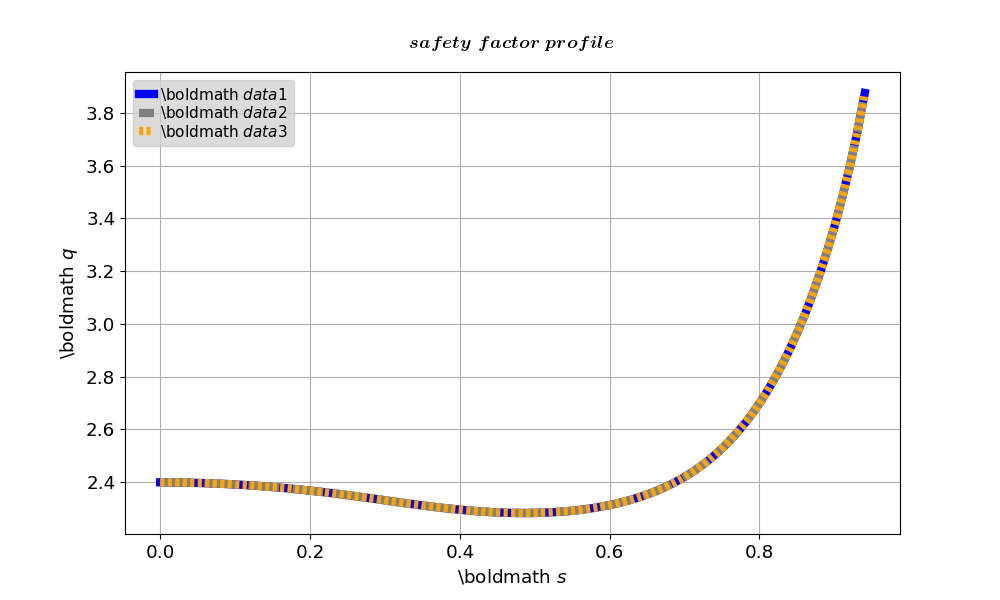

In [41]:
# **********************************
# *** PLOT SAFETY FACTOR PROFILE ***
# **********************************
reload()

ff = GLO.DEF_PLOT_FORMAT
ff['xlabel'] = 's'
ff['ylabel'] = 'q'
ff['title'] = [None, 'safety\ factor\ profile']
ff['styles'] = ['-', '--', ':']
ff['legends'] = ['data1', 'data2', 'data3']
ff['colors'] = [None, 'grey', 'orange']

chosen_signal = GLO.create_signal(GLO.def_safety_factor, b025_f001)
oo_equ = {
    'signals': chosen_signal * 3,
    'ff': ff,
    'x_end': 0.95
}
common.plot_vars_1d(oo_equ)

<IPython.core.display.Javascript object>


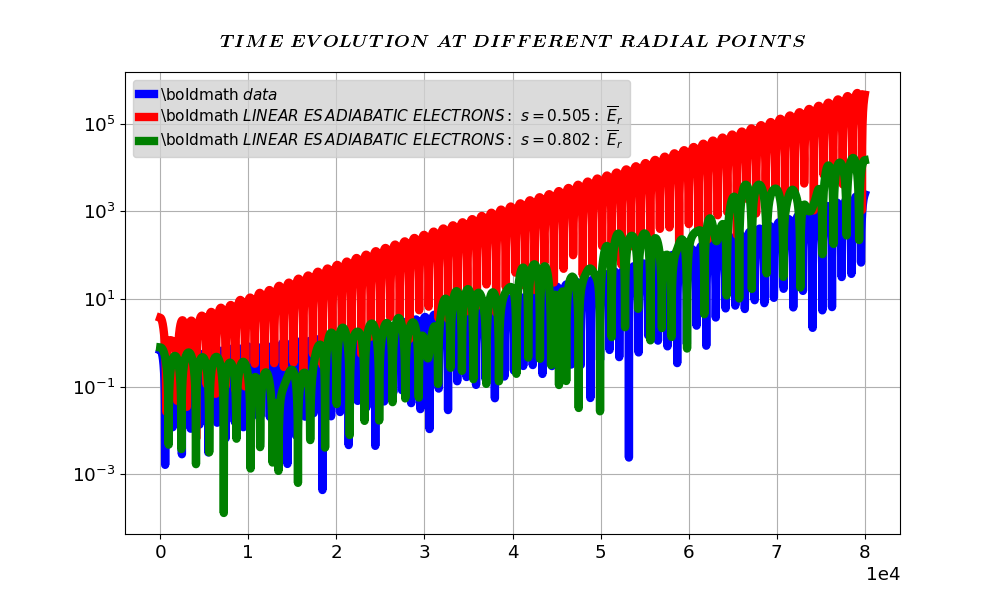

<IPython.core.display.Javascript object>


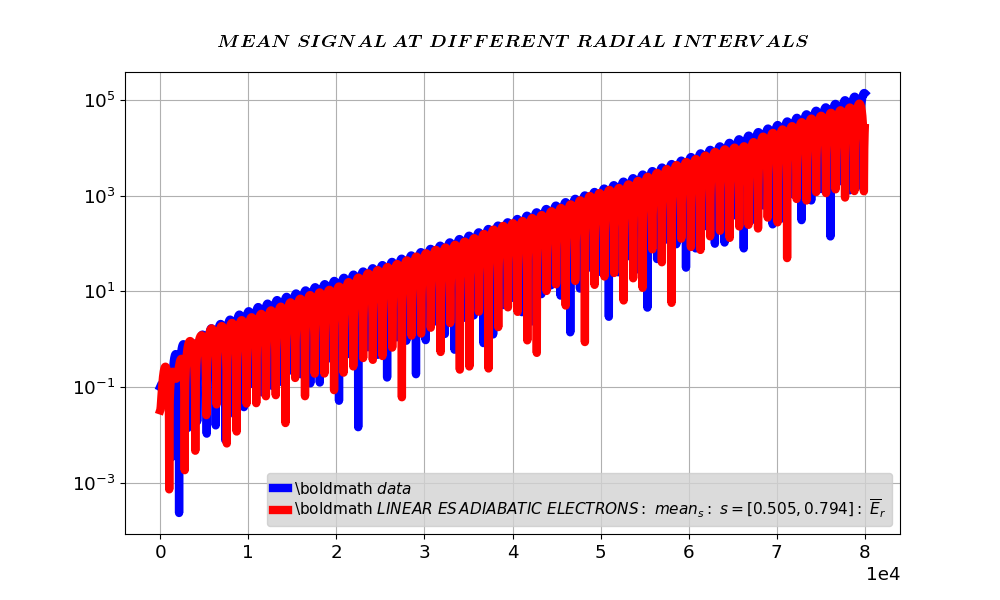

In [31]:
# ***************************************************************
# *** 1D PLOTS: TIME EVOLUTION OF ZONAL RADIAL ELECTRIC FIELD ***
# ***************************************************************
reload()

# plot in logarithmic scale along y
flag_semilogy = True

# --- AT DIFFERENT RADIAL POINTS ---
# plot title
tit_plot = 'TIME\ EVOLUTION\ AT\ DIFFERENT\ RADIAL\ POINTS'

# radial points
s_points = [0.2, 0.5, 0.8]
n_signals = len(s_points)

# projects, where signals will be read from
dds = [b025_f001] * n_signals 

# what to plot
ovars = [['zonal', 'erbar']] * n_signals
avrs = [
    ['ts', 'point-s', s1 ] for s1 in s_points
]

# plotting
oo_t_plotting = {
    'ovars': ovars,
    'avrs': avrs,
    'dds': dds,
    'flag_semilogy': flag_semilogy,
    'tit_plot':  tit_plot,
}
common.plot_vars_1d(oo_t_plotting)

# --- MEAN SIGNAL AT DIFFERENT RADIAL INTERVALS ---
# plot title
tit_plot = 'MEAN\ SIGNAL\ AT\ DIFFERENT\ RADIAL\ INTERVALS'

# radial points
s_intervals = [[0.2, 0.5], [0.5, 0.8]]
n_signals = len(s_intervals)

# projects, where signals will be read from
dds = [b025_f001] * n_signals 

# what to plot
ovars = [['zonal', 'erbar']] * n_signals
avrs = [
    ['ts', 'mean-s', s_one_interval ] for s_one_interval in s_intervals
]

# plotting
oo_t_plotting.update({
    'ovars': ovars,
    'avrs': avrs,
    'dds': dds,
    'tit_plot':  tit_plot,
})
common.plot_vars_1d(oo_t_plotting)

In [27]:
avrs

[['ts', 'point-s', 0.2], ['ts', 'point-s', 0.5], ['ts', 'point-s', 0.8]]

In [ ]:
# *******************************
# *** 1D PLOTS: BASIC STYLING ***
# *******************************
reload()

# --- TIME EVOLUTION AT DIFFERENT RADIAL POINTS ---
tit_plot = 'TIME\ EVOLUTION\ AT\ DIFFERENT\ RADIAL\ POINTS'
s_points = [0.2, 0.5, 0.8]
n_signals = len(s_points)

# projects, where signals will be read from
dds = [b025_f001] * n_signals 

# legends
var_legs = ['s = {:0.1f}'.format(s_one_point) for s_one_point in s_points]

x_end = 5.6e4
stys = ['-', ':']
cols = ['blue', 'red']
labx, laby = 't', '\overline{E}_r' + '(s={:0.2f})'.format(s1)
sel_norm = 't-mili-seconds'
ovars = [['zonal', 'erbar']] * len(dds)
avrs = [ ['ts', 'point-s', [s1] ] ] * len(dds)

# --- PLOTTING ---
oo_t_s1 = {
    'ovars': ovars,
    'avrs': avrs,
    'dds': dds,
    'sel_norm': sel_norm,
    'flag_semilogy': True,
    'stys': stys,
    'cols': cols,
    'labx': labx,
    'laby': laby,
    'legs': var_legs,
    'tit_plot':  tit_plot,
    'x_end': x_end,
}
common.plot_vars_1d(oo_t_s1)

In [35]:
import numpy as np

np.sin(1)
ref_np = np
ref_np.sin(2)

0.9092974268256817